# **Análisis del uso de las energías en España y su relación con las energías renovables.**

### Trabajo por **Álvaro Mendoza González** y **Jesús Enrique Cartas Rascón**


---


En este análisis pretendemos entender qué energías se utlizan en España principalmente, cuánto y cómo. Intentaremos también arrojar luz en el tema de las energías renovables y su relación con las energías clásicas, para ver en qué medida merece la pena dar el salto. 

Todos los datos provienen del [**Eurostat**](https://ec.europa.eu/eurostat), una gran fuente de datos estadísticos a nivel europeo.




# Tabla de contenidos

> Introducción

> Cómo y cuánto se usa cada tipo de energía

> Cómo de accesible es esta energía a los diferentes sectores


> Cómo de eficiente es cada tipo de energía

> Cuales son los niveles de contaminación producidos por cada tipo de energía

> Cómo evoluciona el ritmo de uso de las energías renovables

> Cómo se relacionan éstas energías con las energías renovables

## Introducción

Dedicaremos esta primera parte a importar las librerías y archivos necesarios para el análisis, así como a definir un conjunto de funciones que nos sirvan de ayuda y agilicen el proceso de desarrollo.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
base_url = "https://raw.githubusercontent.com/jesi-rgb/proyectoTGI/master/"

In [3]:
electricity_prices_household = pd.read_csv(base_url + "energy_data/electricity_prices_household.csv", delimiter=';')
gas_prices_household = pd.read_csv(base_url + "energy_data/gas_prices_household.csv", delimiter=';')
consum = pd.read_csv('energy_data/consumo_energias_sector.csv', delimiter=';')
consum_total = pd.read_csv("energy_data/consumo_todas_energias.csv", delimiter=';')
energy_cons = pd.read_csv("energy_data/consumo_todas_energias.csv", delimiter=';')

In [4]:
def consulta_por_valor_columna(dataframe, valor, nombre_columna):
    return dataframe[dataframe[nombre_columna] == valor]

In [5]:
def crear_grafica(x_data, y_data, titulo='XD', x_label='X', y_label='D'):
    plt.figure(figsize=(20, 10))
    plt.plot(x_data, y_data)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(titulo)

In [6]:
def castear_a_float(input_list):
    '''Recibe una lista de valores y devuelve otra con los valores interpretados como flotantes.
    Esta función NO edita la columna, devuelve una nueva. La columna del dataframe original deberá ser sobreescrita pertinentemente.
    ''' 
    return input_list.apply(float)

In [7]:
def string_replace_columna(columna, valor_a_buscar, valor_sustituto):
    '''Busca espacios en la columna y los elimina
    Esta función NO edita la columna, devuelve una nueva. La columna del dataframe original deberá ser sobreescrita pertinentemente.
    '''
    return columna.str.replace(valor_a_buscar, valor_sustituto)

In [8]:
def eliminar_valores_invalidos(dataframe, columna, valor_invalido, valor_nuevo):
    '''Sustituye las instancias de valor_invalido por las de valor nuevo en la columna. Por ejemplo, para sustituir \':\' por -1
    Es recomendable pasar el valor nuevo como tipo igual al que tiene el data frame, para que luego los casteos no se hagan complicados
    '''
    dataframe.loc[dataframe[columna] == valor_invalido, columna] = valor_nuevo

In [9]:
text_arguments = {
    "fontfamily":["Consolas", "Inconsolata"],
    "fontsize":18
}

In [10]:
tableau20 = np.array([(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]) 
tableau20 = tableau20/255

In [11]:
def annot_max(x,y, ax=None, xPos=1, yPos=1):
    xmax = x[pd.Series.idxmax(y)]
    ymax = y.max()
    text = "Max: x={0:s}, y={1:.3f}".format(xmax, float(ymax))
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square", pad=0.3, fc="w" , ec="k", lw=0.52)
    arrowprops = dict(arrowstyle= "-|>", connectionstyle="angle, angleA=0, angleB=60")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top" )
    ax.annotate(text, xy=(xmax, ymax), xytext=(xPos, yPos), **kw)

# Cómo y cuánto se usa cada tipo de energía

En esta sección trataremos de hallar las proporciones de uso de las energías más importantes en España: la energía eléctrica, el consumo de gas

In [12]:
consum_household_es = consum[(consum['nrg_bal'] == 'FC_OTH_HH_E') & (consum['geo\\TIME_PERIOD'] == 'ES')]

In [13]:
consum_household_es = consum_household_es.melt(
    id_vars=['freq', 'nrg_bal', 'siec', 'unit', 'geo\\TIME_PERIOD'],
    var_name='Años',
    value_name='Consumo'
)

In [14]:
consum_household_es.Consumo = castear_a_float(consum_household_es.Consumo)

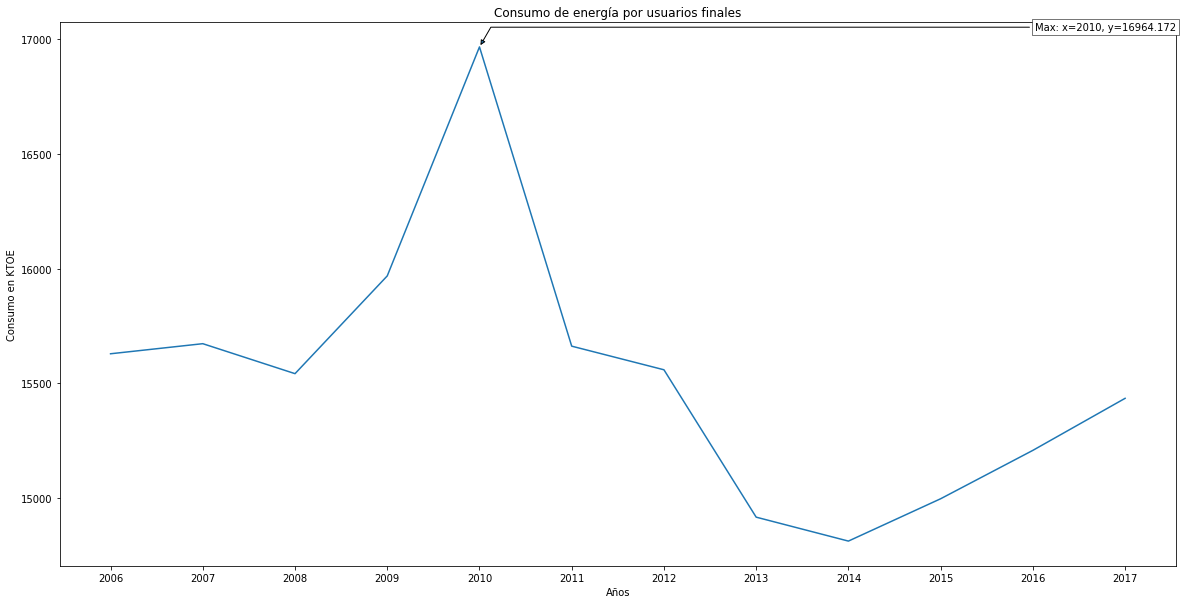

In [15]:
title = 'Consumo de energía por usuarios finales'
ylabel = 'Consumo en KTOE'
xlabel = 'Años'
crear_grafica(consum_household_es.Años, consum_household_es.Consumo, title, xlabel, ylabel)
annot_max(consum_household_es.Años, consum_household_es.Consumo)

##### Consumo de energía eléctrica total #####

In [16]:
consum_elect = consulta_por_valor_columna(consum_total, 'E7000', 'siec')
consum_elect_es = consulta_por_valor_columna(consum_elect, 'ES', 'geo\\TIME_PERIOD')

##### Consumo de gas #####

In [17]:
consum_gas = consulta_por_valor_columna(consum_total, 'G3000', 'siec')
consum_gas_es = consulta_por_valor_columna(consum_gas, 'ES', 'geo\\TIME_PERIOD')

##### Consumo de energías renovables #####

In [18]:
consum_renovables = consulta_por_valor_columna(consum_total, 'RA000', 'siec')
consum_renovables_es = consulta_por_valor_columna(consum_renovables, 'ES', 'geo\\TIME_PERIOD')

In [19]:
consum_elect_es = consum_elect_es.melt(
    id_vars=['freq', 'nrg_bal', 'siec', 'unit', 'geo\\TIME_PERIOD'],
    var_name='Años',
    value_name='Consumo'
)

consum_gas_es = consum_gas_es.melt(
    id_vars=['freq', 'nrg_bal', 'siec', 'unit', 'geo\\TIME_PERIOD'],
    var_name='Años',
    value_name='Consumo'
)

consum_renovables_es = consum_renovables_es.melt(
    id_vars=['freq', 'nrg_bal', 'siec', 'unit', 'geo\\TIME_PERIOD'],
    var_name='Años',
    value_name='Consumo'
)

In [20]:
consum_elect_es.Consumo = castear_a_float(consum_elect_es.Consumo)
consum_gas_es.Consumo = castear_a_float(consum_gas_es.Consumo)
consum_renovables_es.Consumo = castear_a_float(consum_renovables_es.Consumo)

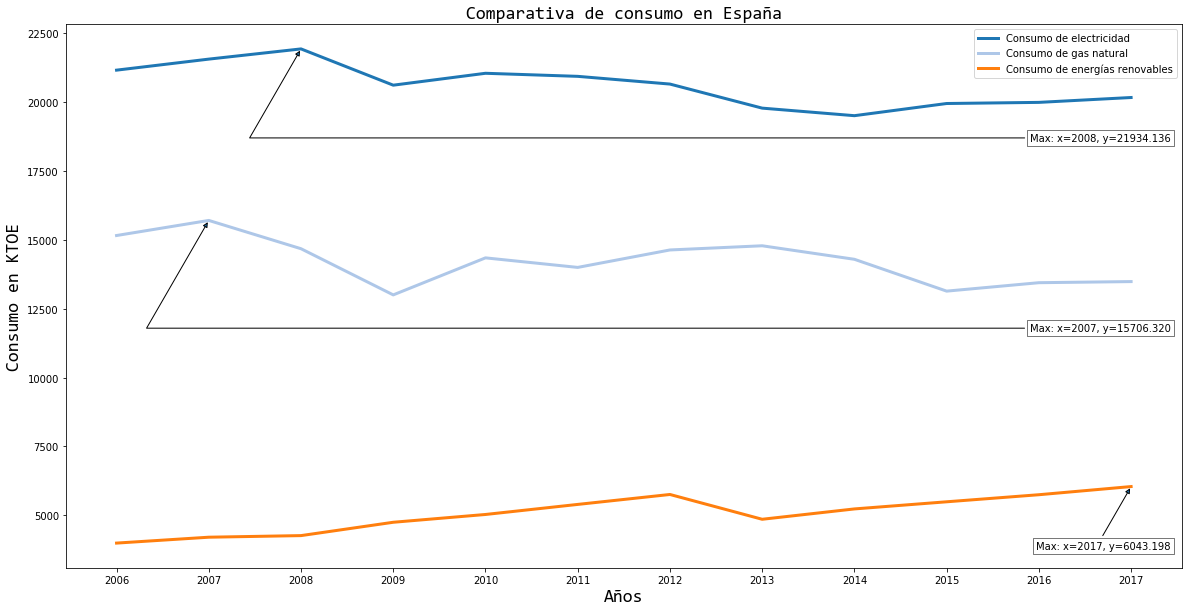

In [21]:
y_data = [consum_elect_es.Consumo,consum_gas_es.Consumo, consum_renovables_es.Consumo]

plt.figure(figsize=(20, 10))
for y in range(len(y_data)):
    plt.plot(consum_elect_es.Años, y_data[y], color=tableau20[y], linewidth=3)
    
plt.title('Comparativa de consumo en España', text_arguments)
plt.xlabel('Años', text_arguments)
plt.ylabel('Consumo en KTOE', text_arguments)
plt.legend(['Consumo de electricidad', 'Consumo de gas natural', 'Consumo de energías renovables'])

annot_max(consum_elect_es.Años, consum_elect_es.Consumo, xPos=0.99, yPos=0.8)
annot_max(consum_gas_es.Años, consum_gas_es.Consumo, xPos=0.99, yPos=0.45)
annot_max(consum_renovables_es.Años, consum_renovables_es.Consumo, xPos=0.99, yPos=0.05)

In [22]:
energy_cons_es = energy_cons[energy_cons['geo\\TIME_PERIOD'] == 'ES'].copy()


In [23]:
eliminar_valores_invalidos(energy_cons_es, '2006', ': z', np.NaN)
eliminar_valores_invalidos(energy_cons_es, '2006', ': ', np.NaN)
energy_cons_es['2006'] = castear_a_float(energy_cons_es['2006'])

In [24]:
eliminar_valores_invalidos(energy_cons_es, '2010', ': z', np.NaN)
eliminar_valores_invalidos(energy_cons_es, '2010', ': ', np.NaN)
energy_cons_es['2010'] = castear_a_float(energy_cons_es['2010'])

In [25]:
eliminar_valores_invalidos(energy_cons_es, '2015', ': z', np.NaN)
eliminar_valores_invalidos(energy_cons_es, '2015', ': ', np.NaN)
energy_cons_es['2015'] = castear_a_float(energy_cons_es['2015'])

In [26]:
energy_cons_es.dropna()

,freq,nrg_bal,siec,unit,geo\TIME_PERIOD,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
143,A,FC_E,C0000X0350-0370,KTOE,ES,752.597,842.064,751.666,594.231,527.002,813.110,524.774,455.930,444.251,432.830,633.965,649.499
144,A,FC_E,C0350-0370,KTOE,ES,309.224,333.326,327.360,252.778,297.975,309.141,275.088,259.582,224.047,228.394,229.044,236.653
145,A,FC_E,E7000,KTOE,ES,21162.941,21563.629,21934.136,20617.197,21049.183,20938.005,20657.610,19783.921,19509.630,19951.677,19992.691,20169.475
146,A,FC_E,G3000,KTOE,ES,15158.491,15706.320,14678.848,13002.580,14347.120,14000.516,14633.964,14786.199,14295.314,13139.402,13445.421,13485.834
147,A,FC_E,H8000,KTOE,ES,0.000,0,0,0,0.000,0,0,0,0,0.000,0,0
149,A,FC_E,O4000XBIO,KTOE,ES,50187.061,51287.682,48479.705,44722.721,43905.675,40501.531,36598.715,35718.001,35238.816,36716.072,37951.765,38805.804
150,A,FC_E,P1000,KTOE,ES,0.000,0,0,0,0.000,0,0,0,0,0.000,0,0
151,A,FC_E,RA000,KTOE,ES,3990.711,4204.397,4262.504,4746.761,5029.594,5394.897,5755.860,4855.596,5231.116,5490.182,5746.866,6043.198
152,A,FC_E,S2000,KTOE,ES,0.000,0,0,0,0.000,0,0,0,0,0.000,0,0
153,A,FC_E,TOTAL,KTOE,ES,91561.026,93937.419,90434.218,83936.267,85156.547,81957.200,78446.010,75859.230,74943.175,75960.969,78005.390,79397.426


In [27]:
energy_cons_es = energy_cons_es.melt(
    id_vars=['freq', 'nrg_bal', 'siec', 'unit', 'geo\\TIME_PERIOD'],
    var_name='Años',
    value_name='Consumo'
)

# Cómo de accesible es esta energía a los diferentes sectores

In [28]:
electricity_prices_household_es = consulta_por_valor_columna(electricity_prices_household, 'ES', 'geo\\time')
gas_prices_household_es = consulta_por_valor_columna(gas_prices_household, 'ES', 'geo\\time')

In [29]:
electricity_prices_household_es_eur = consulta_por_valor_columna(electricity_prices_household_es, 'EUR', 'currency')
electricity_prices_household_es_eur_xtax = consulta_por_valor_columna(electricity_prices_household_es_eur, 'X_TAX', 'tax')


gas_prices_household_es_eur = consulta_por_valor_columna(gas_prices_household_es, 'EUR', 'currency')
gas_prices_household_es_eur_xtax = consulta_por_valor_columna(gas_prices_household_es_eur, 'X_TAX', 'tax')

In [30]:
electricity_prices_household_es_eur_xtax = electricity_prices_household_es_eur_xtax.melt(
    id_vars=['product', 'consom', 'unit', 'tax', 'currency', 'geo\\time'],
    var_name='Semestres',
    value_name='Precio' 
)

In [31]:
gas_prices_household_es_eur_xtax = gas_prices_household_es_eur_xtax.melt(
    id_vars=['product', 'consom', 'unit', 'tax', 'currency', 'geo\\time'],
    var_name='Semestres',
    value_name='Precio' 
)

In [32]:
eliminar_valores_invalidos(electricity_prices_household_es_eur_xtax, 'Precio', ": ", np.NaN)
eliminar_valores_invalidos(electricity_prices_household_es_eur_xtax, 'Precio', ": u", np.NaN)

electricity_prices_household_es_eur_xtax.Precio = string_replace_columna(electricity_prices_household_es_eur_xtax.Precio, 'p', "")
electricity_prices_household_es_eur_xtax.Precio = string_replace_columna(electricity_prices_household_es_eur_xtax.Precio, " ", "")

In [33]:
electricity_prices_household_es_eur_xtax.Precio = castear_a_float(electricity_prices_household_es_eur_xtax.Precio)

In [34]:
eliminar_valores_invalidos(gas_prices_household_es_eur_xtax, 'Precio', ": ", np.NaN)
eliminar_valores_invalidos(gas_prices_household_es_eur_xtax, 'Precio', ": u", np.NaN)

gas_prices_household_es_eur_xtax.Precio = string_replace_columna(gas_prices_household_es_eur_xtax.Precio, 'p', "")
gas_prices_household_es_eur_xtax.Precio = string_replace_columna(gas_prices_household_es_eur_xtax.Precio, " ", "")

In [35]:
gas_prices_household_es_eur_xtax.Precio = castear_a_float(gas_prices_household_es_eur_xtax.Precio)

In [36]:
electricity_prices_household_es_eur_xtax = electricity_prices_household_es_eur_xtax[electricity_prices_household_es_eur_xtax['Semestres'] != '2007S1']

In [37]:
less_1k = (consulta_por_valor_columna(electricity_prices_household_es_eur_xtax, 4161901, 'consom')).Precio
from_1k_to_2k = (consulta_por_valor_columna(electricity_prices_household_es_eur_xtax, 4161902, 'consom')).Precio
from_2k_to_5k = (consulta_por_valor_columna(electricity_prices_household_es_eur_xtax, 4161903, 'consom')).Precio
from_5k_to_15k = (consulta_por_valor_columna(electricity_prices_household_es_eur_xtax, 4161904, 'consom')).Precio
over_15k = (consulta_por_valor_columna(electricity_prices_household_es_eur_xtax, 4161905, 'consom')).Precio

In [38]:
semestres_elec = (electricity_prices_household_es_eur_xtax.Semestres).drop_duplicates()

In [39]:
semestres_elec = semestres_elec.iloc[::-1]
less_1k = less_1k.iloc[::-1]
from_1k_to_2k = from_1k_to_2k.iloc[::-1] 
from_2k_to_5k = from_2k_to_5k.iloc[::-1] 
from_5k_to_15k = from_5k_to_15k.iloc[::-1]
over_15k = over_15k.iloc[::-1]

In [40]:
avg_elec = np.array([less_1k, from_1k_to_2k, from_2k_to_5k, from_5k_to_15k, over_15k])
avg_elec = np.mean(avg_elec, axis=0)
avg_elec = pd.Series(avg_elec)

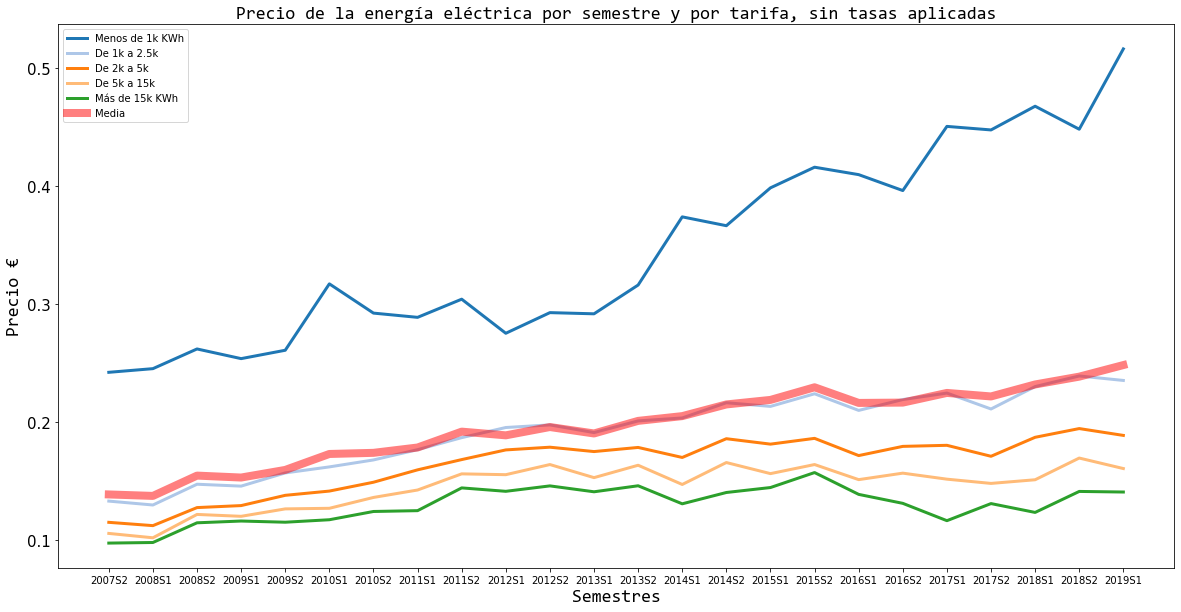

In [41]:
y_data = [less_1k, from_1k_to_2k, from_2k_to_5k, from_5k_to_15k, over_15k]

fig = plt.figure(figsize=(20, 10))

for y in range(len(y_data)):
    plt.plot(semestres_elec, y_data[y], color=tableau20[y], linewidth=3)
del y_data
plt.plot(semestres_elec, avg_elec, 'r-', linewidth=8, alpha=0.5)

#annot_max(semestres_elec, less_1k)

plt.title('Precio de la energía eléctrica por semestre y por tarifa, sin tasas aplicadas', text_arguments)
plt.legend(['Menos de 1k KWh', 'De 1k a 2.5k', 'De 2k a 5k', 'De 5k a 15k', 'Más de 15k KWh', 'Media'])
plt.xlabel('Semestres', text_arguments)
plt.ylabel('Precio €', text_arguments)
plt.tick_params(axis='y', labelsize=15)

##### Preparamos los datos del gas #####

In [42]:
gas_prices_household_es_eur_xtax_gj = consulta_por_valor_columna(gas_prices_household_es_eur_xtax, 'GJ_GCV','unit')

In [43]:
gas_prices_household_es_eur_xtax_gj = gas_prices_household_es_eur_xtax_gj[(gas_prices_household_es_eur_xtax_gj['Semestres'] != '2019S1') & (gas_prices_household_es_eur_xtax_gj['Semestres'] != '2007S1')]

In [44]:
semestres_gas = (gas_prices_household_es_eur_xtax_gj.Semestres).drop_duplicates()

In [45]:
less_20GJ = (consulta_por_valor_columna(gas_prices_household_es_eur_xtax_gj, 4141901, 'consom')).Precio
from_20GJ_to_200GJ = (consulta_por_valor_columna(gas_prices_household_es_eur_xtax_gj, 4141902, 'consom')).Precio
over_200GJ = (consulta_por_valor_columna(gas_prices_household_es_eur_xtax_gj, 4141903, 'consom')).Precio

In [46]:
less_20GJ = less_20GJ.iloc[::-1]
from_20GJ_to_200GJ = from_20GJ_to_200GJ.iloc[::-1]
over_200GJ = over_200GJ.iloc[::-1]
semestres_gas = semestres_gas.iloc[::-1]

In [47]:
averages = np.array([less_20GJ, from_20GJ_to_200GJ, over_200GJ])
averages = (np.mean(averages, axis=0))
averages = pd.Series(averages)

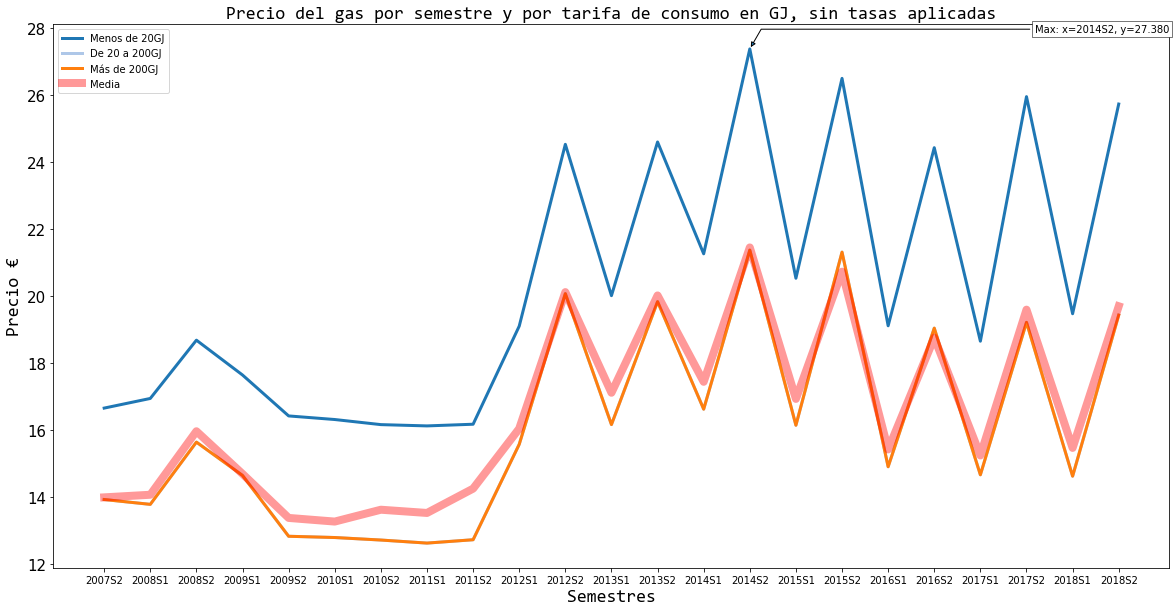

In [48]:
y_data=[less_20GJ, from_20GJ_to_200GJ, from_20GJ_to_200GJ]

fig = plt.figure(figsize=(20, 10))
for y in range(len(y_data)):
    plt.plot(semestres_gas, y_data[y], color=tableau20[y], linewidth=3)
del y_data

plt.plot(semestres_gas, averages, 'r-', linewidth=8, alpha=0.4)
annot_max(semestres_gas, less_20GJ)

plt.title('Precio del gas por semestre y por tarifa de consumo en GJ, sin tasas aplicadas', text_arguments)
plt.legend(['Menos de 20GJ', 'De 20 a 200GJ', 'Más de 200GJ', 'Media'], loc='upper left')
plt.xlabel('Semestres', text_arguments)
plt.ylabel('Precio €', text_arguments)
plt.tick_params(axis='y', labelsize=15)

##### Comparativa de subida de precios #####

In [49]:
print("Precio en 2008 / Precio en 2019: {:.2f}".format(less_20GJ.iloc[-1] / less_20GJ.iloc[0]))

Precio en 2008 / Precio en 2019: 1.55


In [50]:
print("Precio en 2008 / Precio en 2019: {:.2f}".format(less_1k.iloc[-1] / less_1k.iloc[0]))

Precio en 2008 / Precio en 2019: 2.13


# Cómo de eficiente es cada tipo de energía

# Cuales son los niveles de contaminación producidos por cada tipo de energía

# Cómo evoluciona el ritmo de uso de las energías renovables

# Cómo se relacionan éstas energías con las energías renovables